In [2]:
# Import Required Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [3]:
# Load the cleaned dataset

df = pd.read_csv('../data/EV_Battery_Performance_Clean.csv')
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,motor_power_kw
0,Abarth,500e Convertible,155.0,37.8,Lithium-ion,192.00,235.0,156,225,7.0,67.0,1348.84,185.0,FWD,B - Compact,3673.0,1714,1518.0,Hatchback,3.81
1,Abarth,500e Hatchback,155.0,37.8,Lithium-ion,192.00,235.0,149,225,7.0,67.0,1348.84,185.0,FWD,B - Compact,3673.0,1714,1518.0,Hatchback,3.81
2,Abarth,600e Scorpionissima,200.0,50.8,Lithium-ion,102.00,345.0,158,280,5.9,79.0,1348.84,360.0,FWD,JB - Compact,4187.0,1779,1557.0,SUV,7.23
3,Abarth,600e Turismo,200.0,50.8,Lithium-ion,102.00,345.0,158,280,6.2,79.0,1348.84,360.0,FWD,JB - Compact,4187.0,1779,1557.0,SUV,7.23
4,Aiways,U5,150.0,60.0,Lithium-ion,487.77,310.0,156,315,7.5,78.0,1050.05,496.0,FWD,JC - Medium,4680.0,1865,1700.0,SUV,4.87


In [4]:
# Select Relevant Columns

features = ['battery_capacity_kWh', 'efficiency_wh_per_km', 'motor_power_kw',
            'top_speed_kmh', 'torque_nm', 'acceleration_0_100_s',
            'battery_type', 'drivetrain', 'car_body_type', 'brand']
target = 'range_km'

data = df[features + [target]].dropna()


In [5]:
data.head()

,battery_capacity_kWh,efficiency_wh_per_km,motor_power_kw,top_speed_kmh,torque_nm,acceleration_0_100_s,battery_type,drivetrain,car_body_type,brand,range_km
0,37.8,156,3.81,155.0,235.0,7.0,Lithium-ion,FWD,Hatchback,Abarth,225
1,37.8,149,3.81,155.0,235.0,7.0,Lithium-ion,FWD,Hatchback,Abarth,225
2,50.8,158,7.23,200.0,345.0,5.9,Lithium-ion,FWD,SUV,Abarth,280
3,50.8,158,7.23,200.0,345.0,6.2,Lithium-ion,FWD,SUV,Abarth,280
4,60.0,156,4.87,150.0,310.0,7.5,Lithium-ion,FWD,SUV,Aiways,315


In [6]:
# Encode categorical columns

categorical_cols = df.select_dtypes(include=['object']).columns

# Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [7]:
# Define features (X) and target (y)

X = df.drop(columns=['range_km'])  # Independent variables
y = df['range_km']                 # Target variable

In [8]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
X_train.to_csv("../data/X_train.csv", index=False)
X_test.to_csv("../data/X_test.csv", index=False)
y_train.to_csv("../data/y_train.csv", index=False)
y_test.to_csv("../data/y_test.csv", index=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (379, 19)
X_test shape: (95, 19)


In [10]:
# Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train Multiple Models and Save Best One

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []
best_model = None
best_score = -np.inf  # Initialize with a very low score

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        "Model": name,
        "R2 Score": r2,
        "MAE": mae,
        "RMSE": rmse
    })
    
    # Save best model based on R²
    if r2 > best_score:
        best_score = r2
        best_model = model
        best_model_name = name


In [12]:
# Display Model Performance

results_df = pd.DataFrame(results)
print("\nModel Evaluation Results:\n")
print(results_df)


Model Evaluation Results:

               Model  R2 Score        MAE       RMSE
0  Linear Regression  0.952232  18.507753  22.539737
1   Ridge Regression  0.952065  18.560051  22.579177
2   Lasso Regression  0.953736  18.322366  22.182088
3      Random Forest  0.969547  12.207368  17.996813


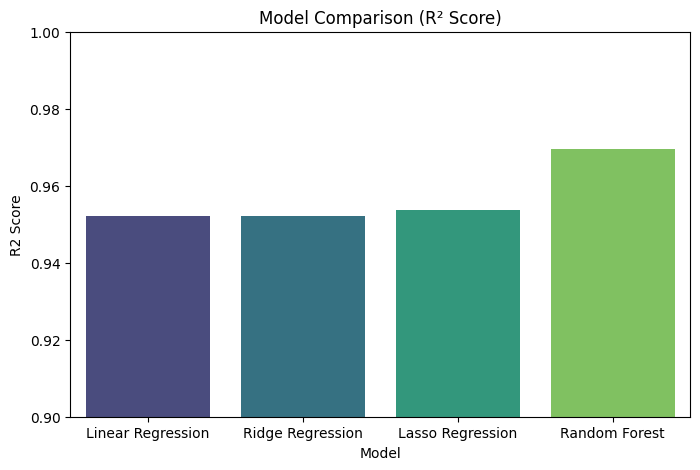

<Figure size 640x480 with 0 Axes>

In [13]:
# Visualize Model Comparison

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R2 Score', hue='Model', data=results_df, palette='viridis', legend=False)
plt.title('Model Comparison (R² Score)')
plt.ylim(0.9, 1)
plt.show()
plt.savefig('../visuals/model_comparison_(R² Score).png', dpi=300, bbox_inches='tight')


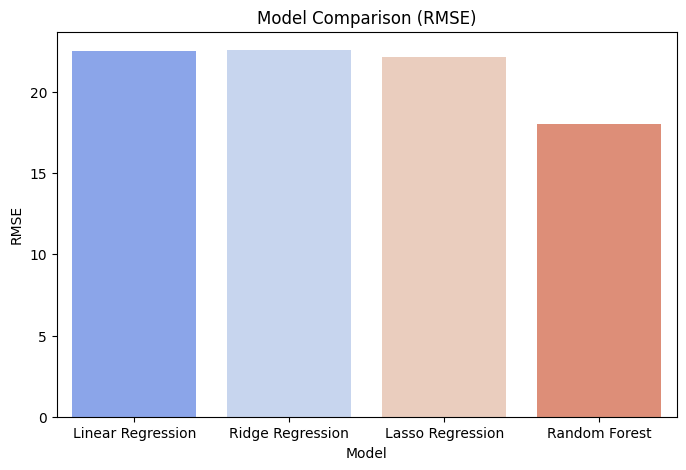

<Figure size 640x480 with 0 Axes>

In [14]:
# Model Comparison (RMSE)

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='RMSE', hue='Model', data=results_df, palette='coolwarm', legend=False)
plt.title('Model Comparison (RMSE)')
plt.show()
plt.savefig('../visuals/model_comparison_(RMSE).png', dpi=300, bbox_inches='tight')

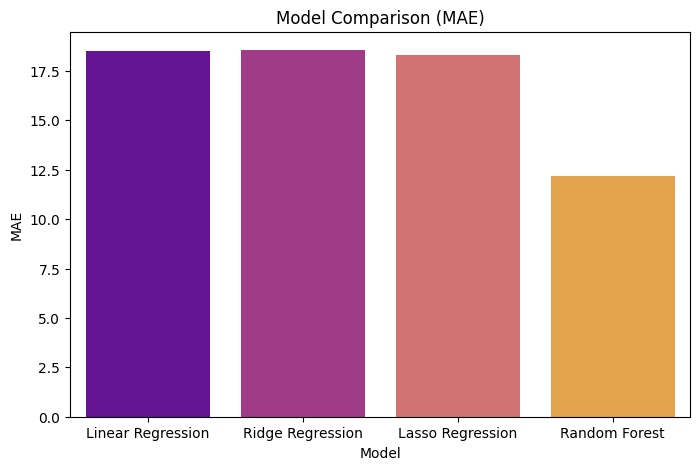

<Figure size 640x480 with 0 Axes>

In [15]:
# Model Comparison (MAE)

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='MAE', hue='Model', data=results_df, palette='plasma', legend=False)
plt.title('Model Comparison (MAE)')
plt.show()
plt.savefig('../visuals/model_comparison_(MAE).png', dpi=300, bbox_inches='tight')

In [16]:
# feature_importance

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance



,Feature,Importance
3,battery_capacity_kWh,0.776024
16,height_mm,0.051567
18,motor_power_kw,0.033329
9,fast_charging_power_kw_dc,0.026153
7,efficiency_wh_per_km,0.022879
2,top_speed_kmh,0.018325
13,segment,0.015599
11,cargo_volume_l,0.009653
14,length_mm,0.009179
8,acceleration_0_100_s,0.008904


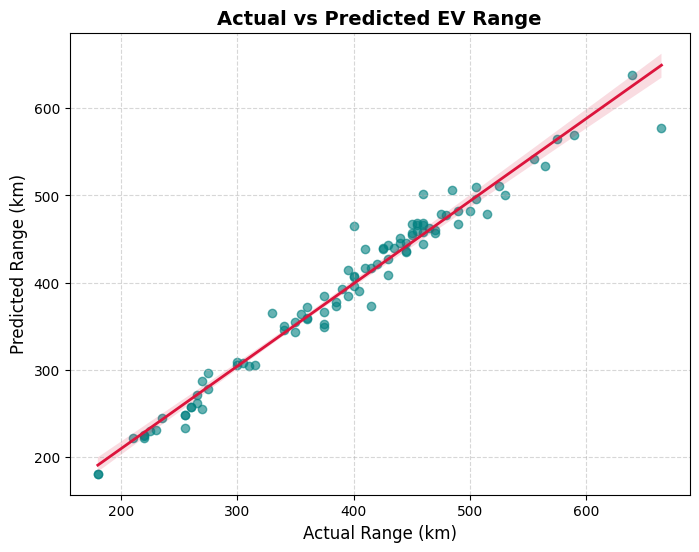

<Figure size 640x480 with 0 Axes>

In [17]:
# Actual vs Predicted EV Range

plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color':'teal', 'alpha':0.6}, line_kws={'color':'crimson', 'lw':2})
plt.xlabel("Actual Range (km)", fontsize=12)
plt.ylabel("Predicted Range (km)", fontsize=12)
plt.title("Actual vs Predicted EV Range", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
plt.savefig('../visuals/actual_vs_predicted_ev_range.png', dpi=300, bbox_inches='tight')

In [18]:
# Save the best model
joblib.dump(best_model, f'../models/{best_model_name.replace(" ", "_").lower()}_ev_range.pkl')
print(f"\nBest model saved: {best_model_name}")

# Save results
results_df.to_csv('../models/model_results.csv', index=False)
print("Model results saved successfully.")



Best model saved: Random Forest
Model results saved successfully.


In [20]:
features = ['top_speed_kmh', 'battery_capacity_kWh', 'torque_nm',
            'efficiency_wh_per_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc']

X = df[features]
y = df['range_km']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

joblib.dump(rf, "../models/random_forest_simple.pkl")
print("Model retrained with 6 features and saved as random_forest_simple.pkl")


Model retrained with 6 features and saved as random_forest_simple.pkl
